In [135]:
import math
import matplotlib.pyplot as plt
import numpy as np

a=0.37

def u(t:float, x:float) -> float:
    return math.sin(2*math.pi*x)*math.cos(math.pi*t)+2.5*math.pi*x

def f(t:float, x:float) -> float:
    return math.pi*(-math.sin(2*math.pi*x)*math.sin(math.pi*t)+a*(2*math.cos(2*math.pi*x)*math.cos(math.pi*t)+2.5))

np.set_printoptions(precision=3)

In [136]:
n_count = 11
i_count = 11
h_x = 1/(n_count-1)
h_t = 1/(i_count-1)
x = [h_x * n for n in range(n_count)]
t = [h_t * i for i in range(i_count)]

In [137]:
# вбиваем краевые условия в нашу сетку
U = np.zeros((i_count, n_count))
for i in range(i_count):
    U[i, 0] = u(t[i], 0)
for n in range (n_count):
    U[0, n] = u(0, x[n])

In [138]:
#решим ВСЕ как первую явную схема
for i in range(1, i_count):
    for n in range(1, n_count):
        r=a*h_t/h_x
        U[i,n]=(h_t*f(t[i],x[n])+U[i-1,n]+r*U[i,n-1])/(1+r)

In [139]:
print(np.array([[abs(u(t[i],x[n])-U[i,n]) for i in range(i_count)] for n in range(n_count)]))

[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.041 0.066 0.075 0.07  0.053 0.028 0.003 0.035 0.065 0.09 ]
 [0.    0.088 0.148 0.178 0.177 0.147 0.094 0.024 0.055 0.132 0.2  ]
 [0.    0.107 0.19  0.241 0.254 0.228 0.169 0.082 0.023 0.134 0.238]
 [0.    0.087 0.165 0.222 0.251 0.247 0.21  0.141 0.05  0.056 0.166]
 [0.    0.034 0.078 0.123 0.161 0.185 0.188 0.169 0.128 0.068 0.006]
 [0.    0.032 0.038 0.021 0.013 0.057 0.104 0.144 0.173 0.184 0.175]
 [0.    0.085 0.139 0.157 0.139 0.09  0.016 0.071 0.161 0.242 0.304]
 [0.    0.106 0.187 0.233 0.238 0.201 0.128 0.026 0.092 0.214 0.324]
 [0.    0.087 0.164 0.22  0.245 0.235 0.19  0.112 0.01  0.107 0.226]
 [0.    0.034 0.078 0.122 0.159 0.18  0.179 0.155 0.107 0.038 0.044]]


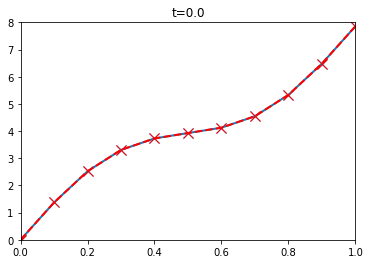

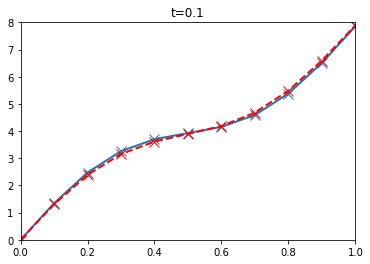

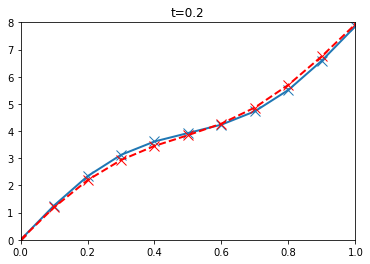

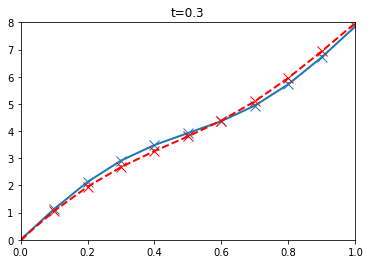

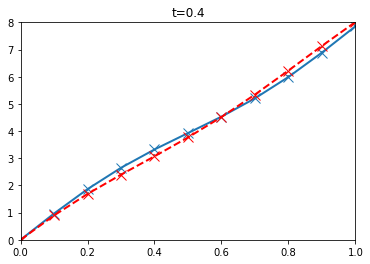

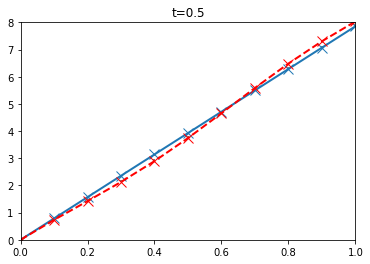

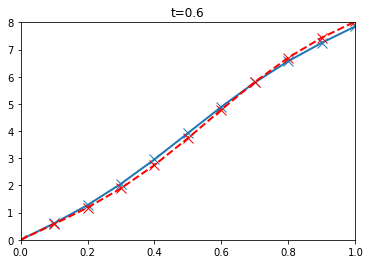

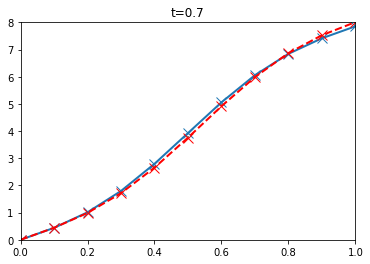

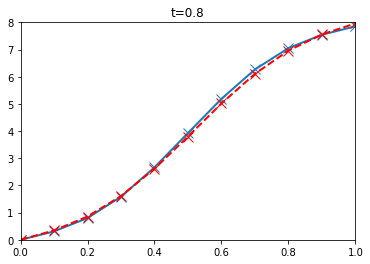

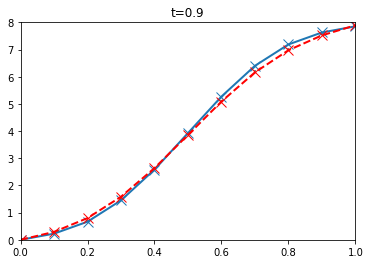

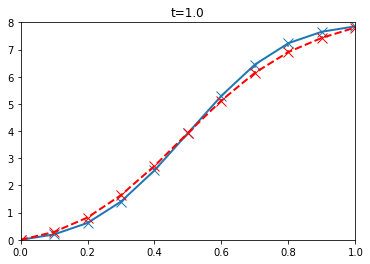

In [140]:
for i in range(i_count):
    u_x = [u(t[i], x[n]) for n in range(n_count)]
    
    fig = plt.figure()
    plt.xlim([0,1])
    plt.ylim([0,8])
    [plt.plot([x[n],x[n]],[min(U[i, n], u(t[i], x[n])), max((U[i, n], u(t[i], x[n])))],':', color='grey', linewidth=2) for n in range(1, n_count)]
    plt.plot(x, u_x, marker='x', markersize=10, linewidth=2)
    plt.plot(x, U[i, :], '--', marker='x', color='red', markersize=10, linewidth=2)
    plt.title('t=%.1f' % t[i])
    plt.show()


[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
[3.9269908169872414, 3.9269908169872414, 3.9269908169872414, 3.9269908169872414, 3.9269908169872414, 3.9269908169872414, 3.9269908169872414, 3.9269908169872414, 3.9269908169872414, 3.9269908169872414, 3.9269908169872414]


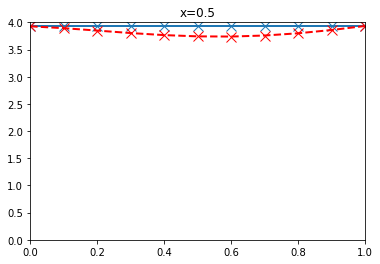

In [141]:
u_t_05 = [u(t[i], x[n_count//2]) for i in range(i_count)]
print(t)
print(u_t_05)
fig = plt.figure()
plt.xlim([0,1])
plt.ylim([0,4])
plt.plot(t, u_t_05, marker='x', markersize=10, linewidth=2)
plt.plot(t, U[:,n_count//2], '--', marker='x', color='red', markersize=10, linewidth=2)
plt.title('x=%.1f' % 0.5)
plt.show()

In [142]:
%%time
arr_err_2d=[]
arr_tau_h=[]
N = 150
for iterator in range(3,N+5):
    n_count = iterator
    i_count = iterator
    h_x = 1/(n_count-1)
    h_t = 1/(i_count-1)
    x = [h_x * n for n in range(n_count)]
    t = [h_t * i for i in range(i_count)]
    
    U = np.zeros((i_count, n_count))
    for i in range(i_count):
        U[i, 0] = u(t[i], 0)
    for n in range (n_count):
        U[0, n] = u(0, x[n])

    
    for i in range(1, i_count):
        for n in range(1, n_count):
            r=a*h_t/h_x
            U[i,n]=(h_t*f(t[i],x[n])+U[i-1,n]+r*U[i,n-1])/(1+r)
            
    max_err=0
    for i in range(i_count):        
        u_x = [u(t[i], h_x * n) for n in range(n_count)]
        max_err=max(max_err, max([abs(U[i, n] - u_x[n]) for n in range(n_count)]))
    
    arr_tau_h.append(2*h_t)
    arr_err_2d.append(max_err)
    

Wall time: 4.88 s


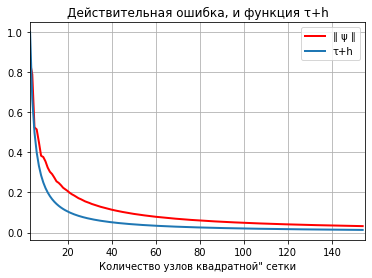

In [143]:
fig = plt.figure()
plt.xlim([3,155])
plt.title('Действительная ошибка, и функция τ+h')
plt.xlabel('Количество узлов квадратной" сетки')
plt.plot([it for it in range(3, N+5)], arr_err_2d, marker='None', color='r', markersize=10, linewidth=2, label='∥ ψ ∥')
plt.plot([it for it in range(3, N+5)], arr_tau_h, marker='None', markersize=10, linewidth=2, label='τ+h')
plt.legend()
# plt.savefig(str(1).zfill(2)+'.jpg')
plt.grid(True)

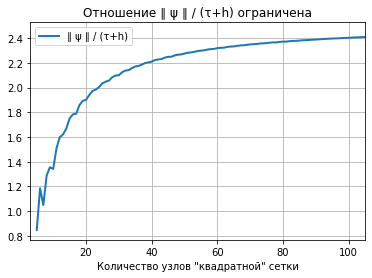

In [144]:
plt.figure()
plt.xlim([3,105])
plt.title('Отношение ∥ ψ ∥ / (τ+h) ограничена')
plt.xlabel('Количество узлов "квадратной" сетки')
plt.plot([it for it in range(5, N+5)], [arr_err_2d[it]/arr_tau_h[it] for it in range(N)], linewidth=2, label='∥ ψ ∥ / (τ+h)')
plt.legend()
plt.grid(True)